In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("COVID-19-time-series-clean-complete.csv")
data.head(10)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
5,5,2020-01-22,Antigua and Barbuda,0,0,0.0,0.0,0,0,0
6,6,2020-01-22,Argentina,0,0,0.0,0.0,0,0,0
7,7,2020-01-22,Armenia,0,0,0.0,0.0,0,0,0
8,8,2020-01-22,Australia,0,0,0.0,0.0,0,0,0
9,9,2020-01-22,Austria,0,0,0.0,0.0,0,0,0


In [31]:
data['Date'] = pd.to_datetime(data['Date'])
data['NewDate'] = data['Date'].map(lambda date: 100*date.year +date.month)
data.head(10)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,NewDate
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001
5,5,2020-01-22,Antigua and Barbuda,0,0,0.0,0.0,0,0,0,202001
6,6,2020-01-22,Argentina,0,0,0.0,0.0,0,0,0,202001
7,7,2020-01-22,Armenia,0,0,0.0,0.0,0,0,0,202001
8,8,2020-01-22,Australia,0,0,0.0,0.0,0,0,0,202001
9,9,2020-01-22,Austria,0,0,0.0,0.0,0,0,0,202001


In [7]:
data_Monthapril = data.query('NewDate==202004')
data_Monthapril.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,NewDate
13510,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
13511,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
13512,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
13513,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
13514,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004


In [12]:
data_Monthapril_sum = data_Monthapril.groupby(['Country/Region'])['New cases'].sum().reset_index()
data_Monthapril_sum.head(20)

,Country/Region,New cases
0,Afghanistan,1952
1,Albania,530
2,Algeria,3290
3,Andorra,369
4,Angola,20
5,Antigua and Barbuda,17
6,Argentina,3374
7,Armenia,1534
8,Australia,2207
9,Austria,5272


In [19]:
index_sorted = data_Monthapril_sum.sort_values('New cases', ascending = False).reset_index()
index_sorted.head(8)

,index,Country/Region,New cases
0,179,US,888804
1,61,France,140313
2,183,United Kingdom,139956
3,162,Spain,127546
4,178,Turkey,106673
5,142,Russia,104161
6,84,Italy,99671
7,65,Germany,91201


In [36]:
data_iran_newCases = data.loc[(data['Country/Region']=='Iran')].groupby(['NewDate'])['New cases'].sum().reset_index()
data_iran_newCases

,NewDate,New cases
0,202001,0
1,202002,593
2,202003,44012
3,202004,50035
4,202005,56826
5,202006,76196
6,202007,76542
7,202008,71008
8,202009,82007
9,202010,155553


In [37]:
data_iran_NewDeaths = data.loc[(data['Country/Region']=='Iran')].groupby(['NewDate'])['New deaths'].sum().reset_index()
data_iran_NewDeaths

,NewDate,New deaths
0,202001,0
1,202002,43
2,202003,2855
3,202004,3130
4,202005,1769
5,202006,3020
6,202007,5949
7,202008,4805
8,202009,4598
9,202010,8695


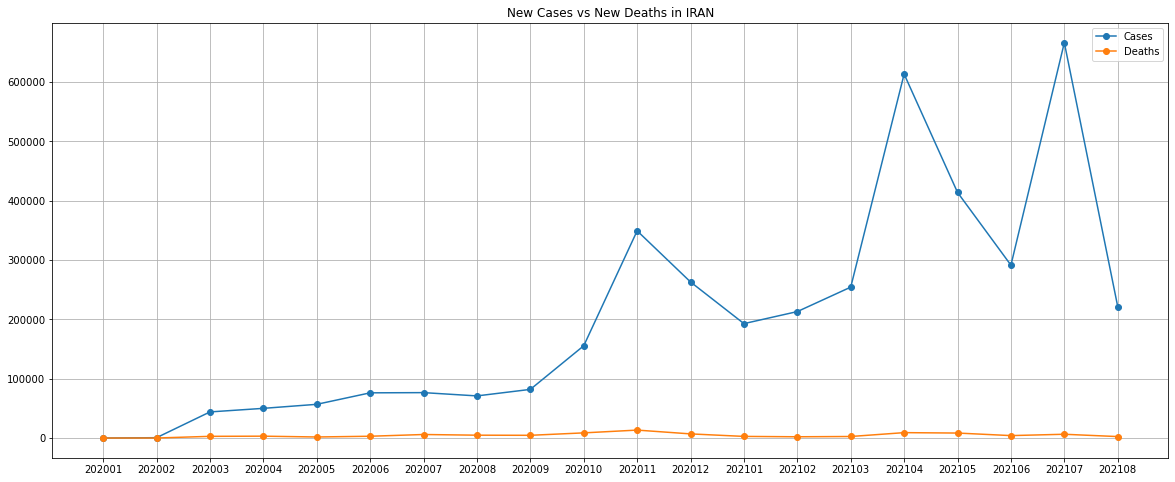

In [50]:
plt.figure(figsize=(20,8))
plt.plot(data_iran_newCases['NewDate'].to_numpy(dtype=str), data_iran_newCases['New cases'] ,marker='o')
plt.plot(data_iran_NewDeaths['NewDate'].to_numpy(dtype=str), data_iran_NewDeaths['New deaths'] ,  marker='o')
plt.legend(['Cases' , 'Deaths'])
plt.title('New Cases vs New Deaths in IRAN')
plt.grid()
